In [9]:
import os
import json
import matplotlib.pyplot as plt

In [2]:
json_dir = "./../../data/temp/skeletons/yolo-L"
sample = os.listdir(json_dir)[0]
with open(os.path.join(json_dir, sample)) as f:
    data = json.load(f)

print(sample)
print(json.dumps(data, indent=2)[:800])

trimmed_columpioscam2-2024-12-14_22-20-00_00-00-09_to_00-00-13_752.json
[
  {
    "frame": 0,
    "people": [
      {
        "id": 0,
        "keypoints": [
          {
            "x": 1296.1610107421875,
            "y": 571.5167846679688,
            "conf": 0.9290037155151367
          },
          {
            "x": 1301.918212890625,
            "y": 566.2705078125,
            "conf": 0.9185054302215576
          },
          {
            "x": 1294.017333984375,
            "y": 565.5018310546875,
            "conf": 0.7570400834083557
          },
          {
            "x": 1313.305908203125,
            "y": 569.6761474609375,
            "conf": 0.8250449299812317
          },
          {
            "x": 1291.49267578125,
            "y": 567.9277954101562,
            "conf": 0.27030566334724426
          },
          {
            "x": 1322.77


In [3]:
json_files = sorted([f for f in os.listdir(json_dir) if f.endswith(".json")])

In [10]:
skeleton_links = [
    (5, 7), (7, 9),     # left arm
    (6, 8), (8, 10),    # right arm
    (5, 6),              # shoulders
    (11, 13), (13, 15), # left leg
    (12, 14), (14, 16), # right leg
    (11, 12),            # hips
    (5, 11), (6, 12)     # body diagonal
]

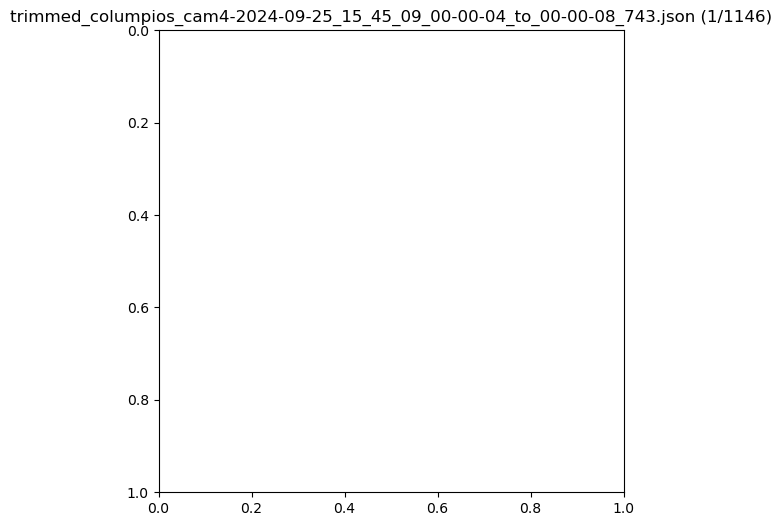

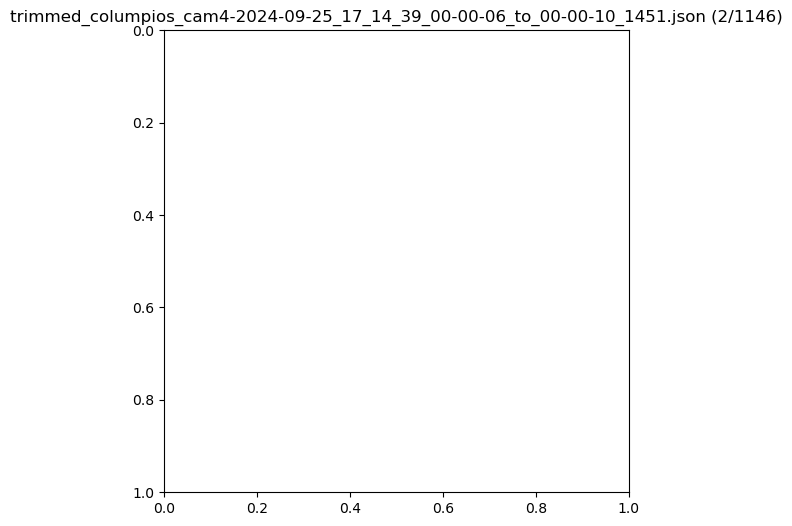

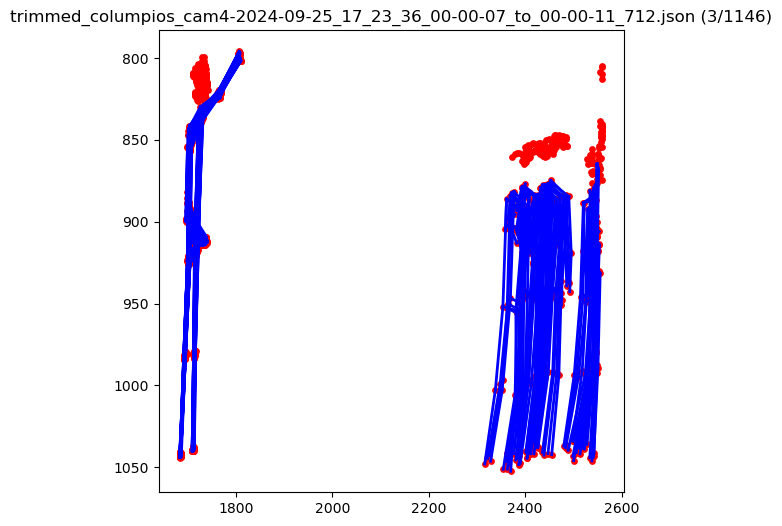

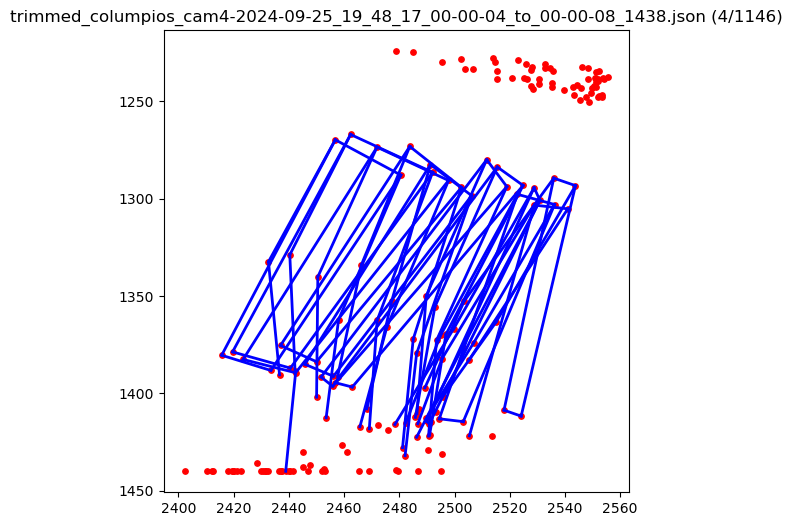

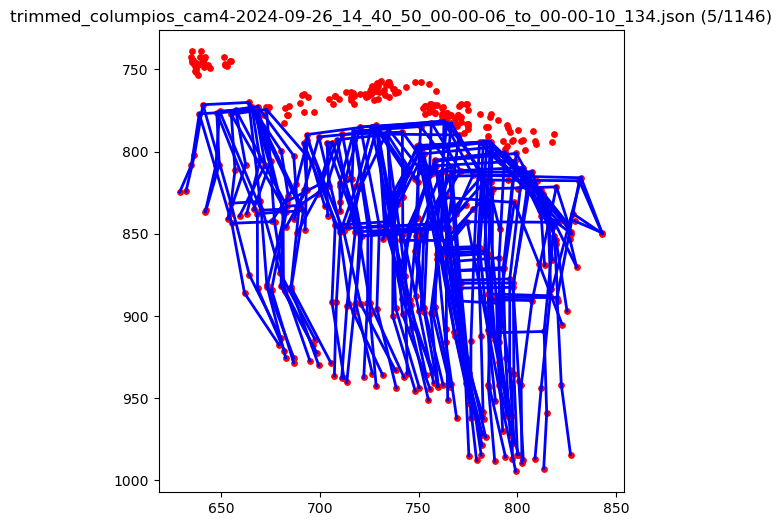

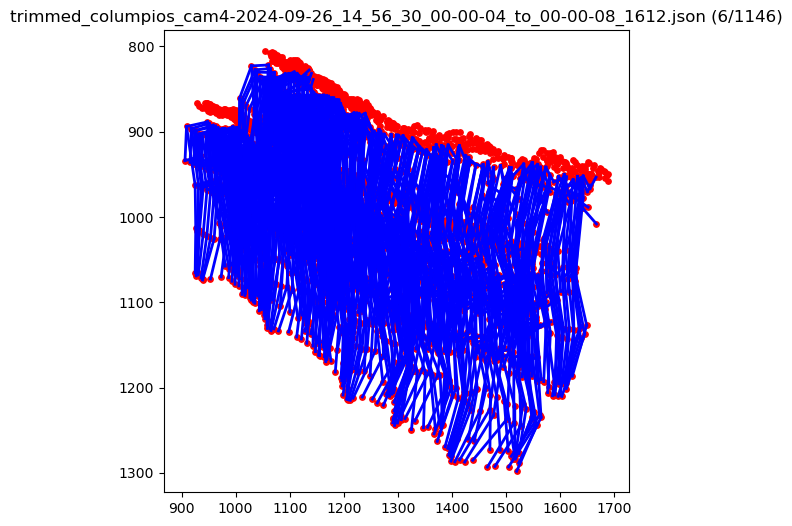

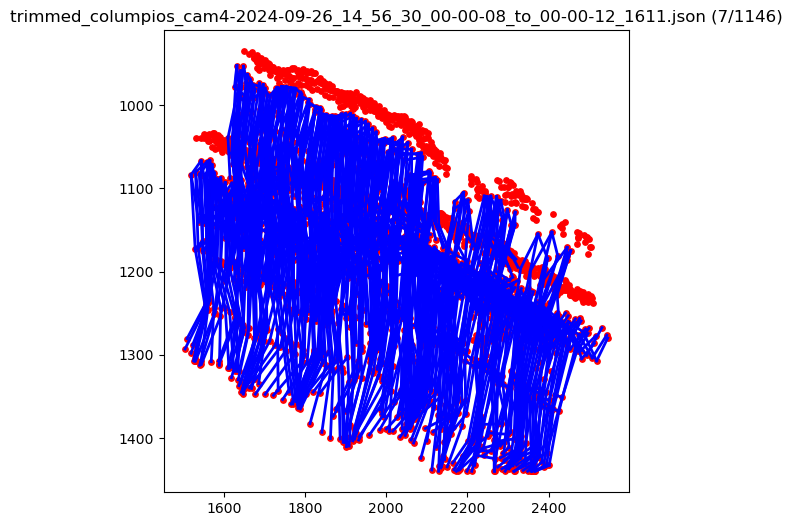

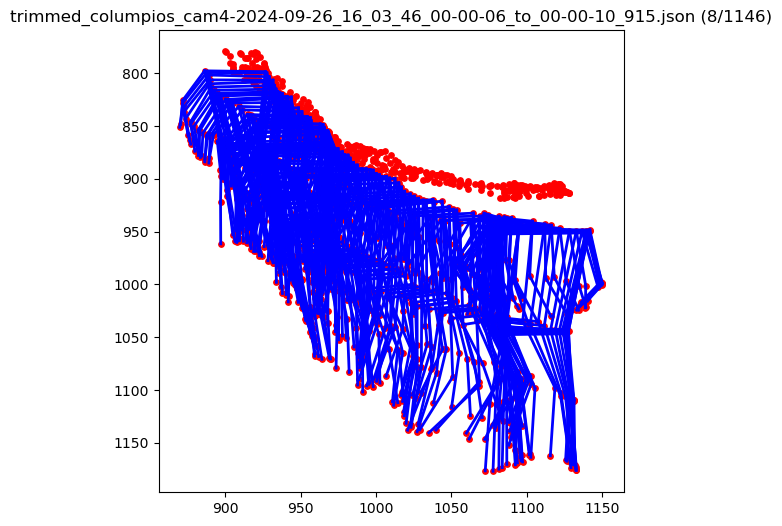

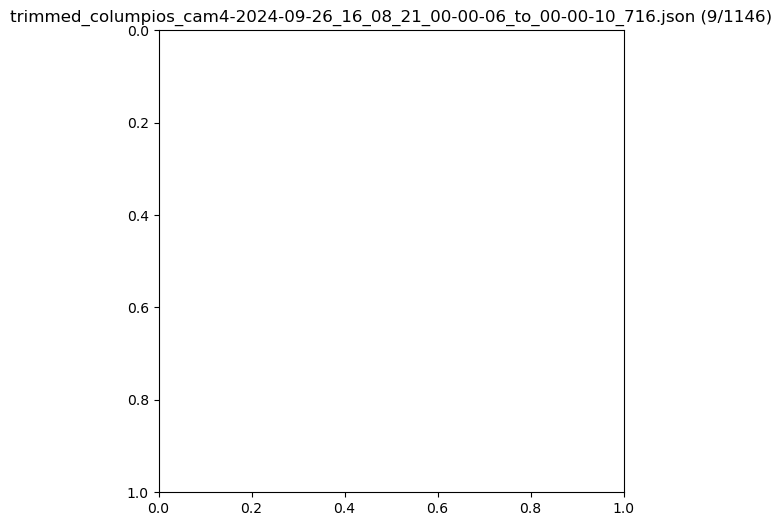

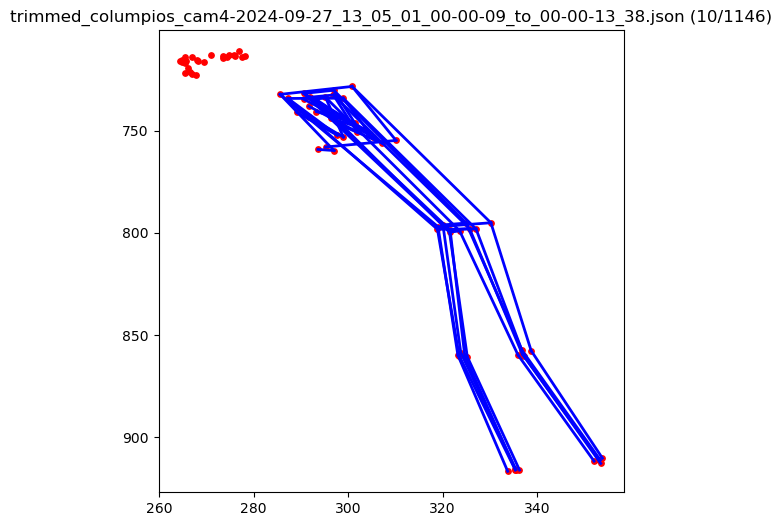

In [15]:
max_frames = 10

for idx, fname in enumerate(json_files[:max_frames]):
    with open(os.path.join(json_dir, fname)) as f:
        data = json.load(f)

    frames = data if isinstance(data, list) else [data]

    fig, ax = plt.subplots(figsize=(6,6))
    for frame_data in frames:
        for person in frame_data.get("people", []):
            keypoints = person.get("keypoints", [])
            if not keypoints:
                continue
            xs = [kp["x"] for kp in keypoints]
            ys = [kp["y"] for kp in keypoints]
            conf = [kp["conf"] for kp in keypoints]

            ax.scatter(xs, ys, s=15, c='r')

            for (a, b) in skeleton_links:
                if conf[a] > 0.2 and conf[b] > 0.2:
                    ax.plot([xs[a], xs[b]], [ys[a], ys[b]], 'b-', linewidth=2)

    ax.invert_yaxis()
    ax.set_title(f"{fname} ({idx+1}/{len(json_files)})")
    plt.show()